Open HR_comma_sep.csv
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv("HR_comma_sep.csv")
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df1.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From the above table, we can conclude the factors highly responsible for employee leaving are satisfaction_level, average_montly_hours and promotion_last_5years. For salary and Department we need to plot bar graph.

<AxesSubplot:xlabel='salary'>

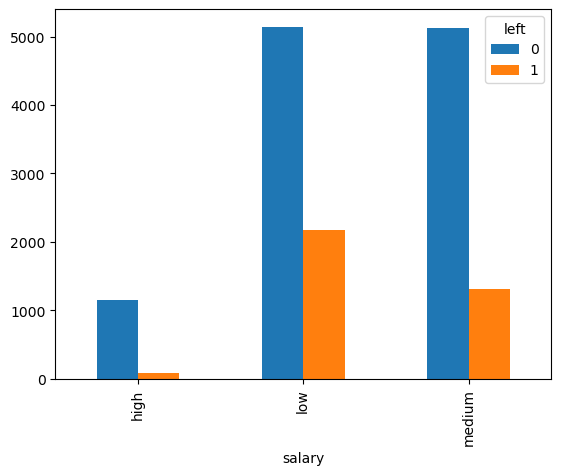

In [4]:
pd.crosstab(df1["salary"],df1["left"]).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

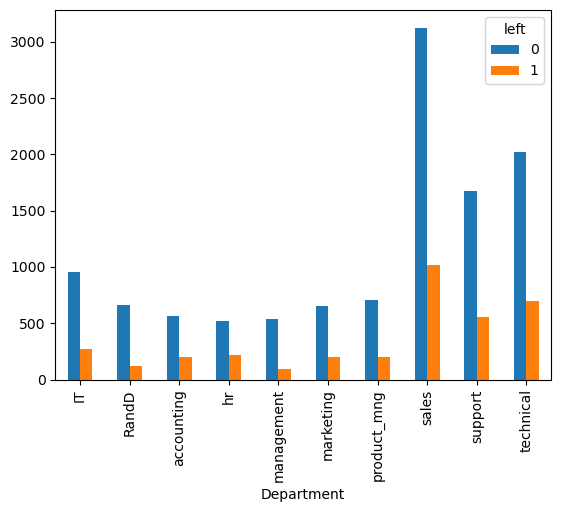

In [5]:
pd.crosstab(df1["Department"],df1["left"]).plot(kind='bar')

The bar chart shows that salary has significant effect but the Department doesn't.

In [6]:
dummies = pd.get_dummies(df1["salary"])
df1_with_dummies = pd.concat([df1, dummies], axis=1)
df1_with_dummies = df1_with_dummies.drop("low", axis=1)
df1_with_dummies

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,high,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,0,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,0,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,0,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,0,0


In [8]:
X = df1_with_dummies[["satisfaction_level", "average_montly_hours", "promotion_last_5years", "high", "medium"]]
y = df1_with_dummies["left"] # X as dataframe but y as series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [10]:
log_reg.score(X_test,y_test)

0.778

Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

Sepal Length <br>
Sepal Width <br>
Petal Length <br>
Petal Width <br>

Using above 4 features you will clasify a flower in one of the three categories,

Setosa <br>
Versicolour <br>
Virginica

In [11]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [12]:
import pandas as pd
df1 = pd.DataFrame(iris.data, columns=iris.feature_names)
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
df1['target'] = iris.target
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [18]:
log_reg.score(X_test, y_test)

1.0

In [19]:
y_predicted = log_reg.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

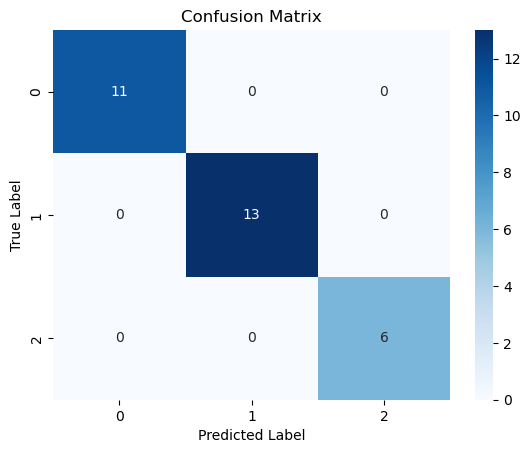

In [20]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

This proves all of them are correct

In file titanic.csv using following columns build a model to predict if person would survive or not,
Pclass <br>
Sex <br>
Age <br>
Fare <br>
Calculate score of your model

In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [22]:
df1 = pd.read_csv("titanic.csv")
df1["Age"]= df1["Age"].fillna(df1["Age"].median())
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
sex_encoder = LabelBinarizer()
df1["Sex_n"] = sex_encoder.fit_transform(df1["Sex"])
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_n
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [24]:
X = df1[["Age", "Fare", "Sex_n"]]
y = df1[["Survived"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
tree_classifier.score(X_test, y_test)

0.7877094972067039

Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then,

1. Measure accuracy of your model using different kernels such as rbf and linear.
2. Tune your model further using regularization and gamma parameters and try to come up with highest accurancy score
3. Use 80% of samples as training data size

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_digits

In [28]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [29]:
X = digits.data
y = digits.target

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [31]:
model_default = SVC()
model_default.fit(X_train, y_train)
model_default.score(X_test, y_test)

0.9916666666666667

In [32]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9916666666666667

In [33]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.08055555555555556

In [34]:
model_kernel = SVC(kernel="linear")
model_kernel.fit(X_train, y_train)
model_kernel.score(X_test, y_test)

0.9777777777777777

In [35]:
y_predicted = model_default.predict(X_test)
cm = confusion_matrix(y_predicted, y_test)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]])

Text(95.72222222222221, 0.5, 'Truth')

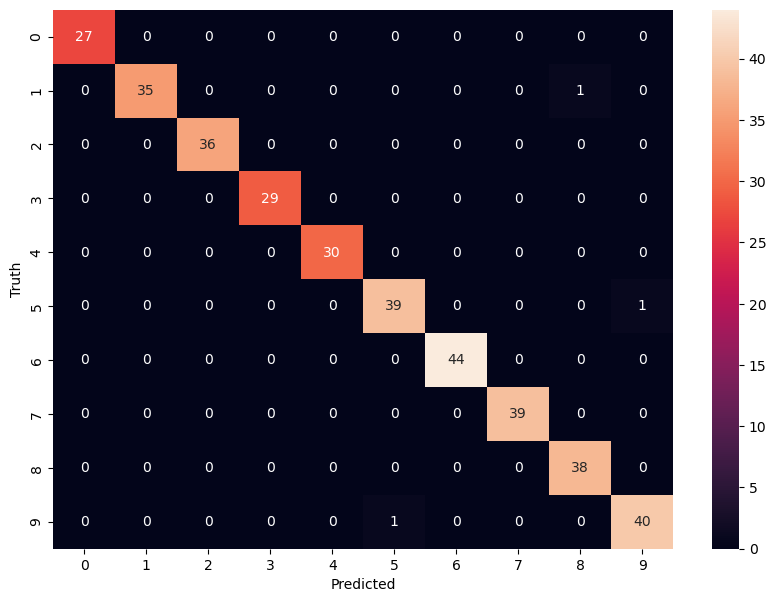

In [36]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Use famous iris flower dataset from sklearn.datasets to predict flower species using random forest classifier.

Measure prediction score using default n_estimators (100). Change n_estimators and evaluate the model

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [38]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [39]:
X = iris.data
y = iris.target

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [41]:
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

0.9210526315789473

In [42]:
model2 = RandomForestClassifier(n_estimators=3)
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.9473684210526315